In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline

Importare 'Completo.csv'

In [2]:
df_1 = pd.read_csv('Ultimate2.csv')
eu1 = pd.read_csv('eu_countries.csv')
Average_working = pd.read_csv('annual-working-hours-per-worker.csv')
Average_working = Average_working.groupby('Entity', as_index=False).mean()
comp = pd.read_csv('Completo.csv')

In [3]:
df_1= df_1.rename(columns={'new_value':'Indice di Povertá'})

In [4]:
eu = pd.merge(eu1,df_1, left_on='name', right_on='Country')

In [5]:
eu = eu.rename(columns={'Value': 'Suicide Rate'})

Lasciare cosi

In [6]:
df_2 = pd.merge(df_1, Average_working, left_on='Country', right_on='Entity')

In [7]:
Average_working = Average_working.drop(['Unnamed: 0', 'Year'],axis=1)

In [8]:
df_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Country', 'Value', 'Lower_value',
       'Upper_value', 'Unnamed: 0.1.1', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank'],
      dtype='object')

In [9]:
df_1 = df_1.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

In [10]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [11]:
global_temp_country_clear = global_temp_country[global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's Temperatura Media for each country

countries = np.unique(global_temp_country['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == 
                                               country]['AverageTemperature'].mean())


In [12]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
#f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
#sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
#Text = ax.set(xlabel='Temperatura Media', title='Average land temperature in countries')

In [13]:
temp = pd.DataFrame(data={'Temperature':mean_temp_bar, 'Country':countries_bar})

In [14]:
temp = temp.drop(241)

In [15]:
df_temp = pd.merge(df_1, temp, on='Country')

In [33]:
df_temp= df_temp.rename(columns={'Temperature':'Temperatura Media', 'Tasso di suicidi':'Tasso di Suicidi'})

OK!!

In [17]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df_temp[['Value','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Indice di Povertá'
       , 'Temperatura Media']].corr()
corr.style.background_gradient(cmap=cmap).set_precision(2)
#4
#Values between 0 and 0.3 (0 and −0.3) indicate a weak positive (negative) linear relationship through a shaky linear rule.
#5
#Values between 0.3 and 0.7 (0.3 and −0.7) indicate a moderate positive (negative) linear relationship through a fuzzy-firm linear rule.
#6
#Values between 0.7 and 1.0 (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.

C:\Users\Federico\AppData\Local\Temp/ipykernel_17616/1404917178.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap=cmap).set_precision(2)


,Value,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Indice di Povertá,Temperatura Media
Value,1.00,-0.07,-0.06,0.08,-0.19,0.06,-0.02,0.09,-0.27
Happiness Score,-0.07,1.00,0.79,0.72,0.77,0.57,0.42,-0.52,-0.40
Economy (GDP per Capita),-0.06,0.79,1.00,0.68,0.83,0.35,0.33,-0.69,-0.46
Family,0.08,0.72,0.68,1.00,0.62,0.43,0.19,-0.52,-0.45
Health (Life Expectancy),-0.19,0.77,0.83,0.62,1.00,0.35,0.25,-0.56,-0.53
Freedom,0.06,0.57,0.35,0.43,0.35,1.00,0.49,-0.22,-0.10
Trust (Government Corruption),-0.02,0.42,0.33,0.19,0.25,0.49,1.00,-0.09,-0.12
Indice di Povertá,0.09,-0.52,-0.69,-0.52,-0.56,-0.22,-0.09,1.00,0.33
Temperatura Media,-0.27,-0.40,-0.46,-0.45,-0.53,-0.10,-0.12,0.33,1.00


In [18]:
eu = eu.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)

In [19]:
eu1.columns

Index(['Unnamed: 0', 'name'], dtype='object')

<AxesSubplot:xlabel='Temperatura Media', ylabel='Tasso di Suicidi'>

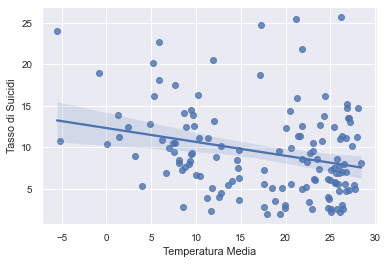

In [36]:
sns.regplot(data=df_temp, x='Temperatura Media', y='Tasso di Suicidi')

In [22]:
eu1 = pd.merge(eu, temp, on ='Country')

In [29]:
df_temp.columns

Index(['Country', 'Tasso di suicidi', 'Lower_value', 'Upper_value',
       'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Happiness Rank', 'Temperatura Media'],
      dtype='object')

In [ ]:
df_temp[['Tasso di Suicidi','Temperatura Media', 'Country']]

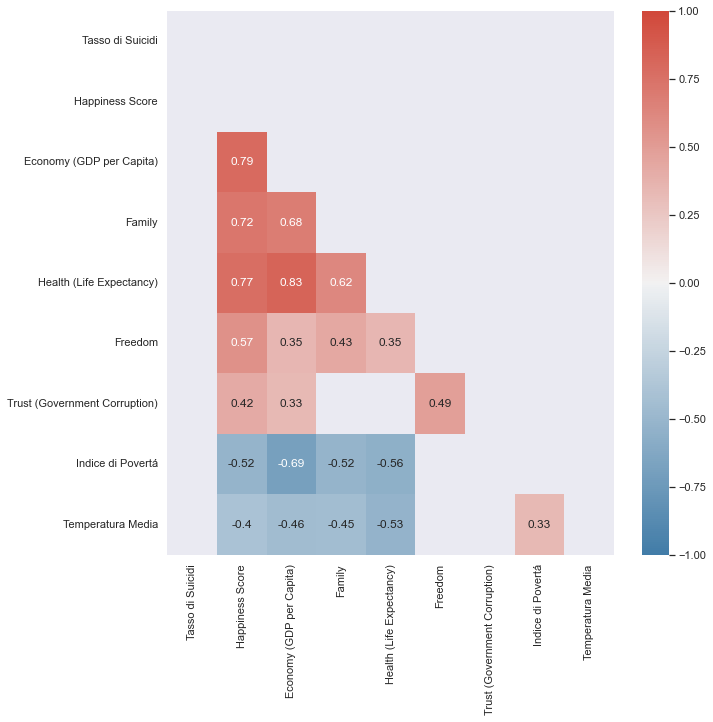

In [156]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = df_temp[['Tasso di Suicidi','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Indice di Povertá'
       ,'Temperatura Media']].corr().round(2)
cmap = sns.diverging_palette(240, 15, as_cmap=True)
matrix = matrix[abs(matrix) >= 0.3]
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix,linecolor='white',vmax=1,annot=True, vmin=-1, cmap=cmap, mask=mask)
plt.show()

In [60]:
eu = pd.merge(eu,temp, on='Country')

In [102]:
eu= eu.rename(columns={'Temperature':'Temperatura Media', 'Suicide Rate':'Tasso di Suicidi'})

<AxesSubplot:>

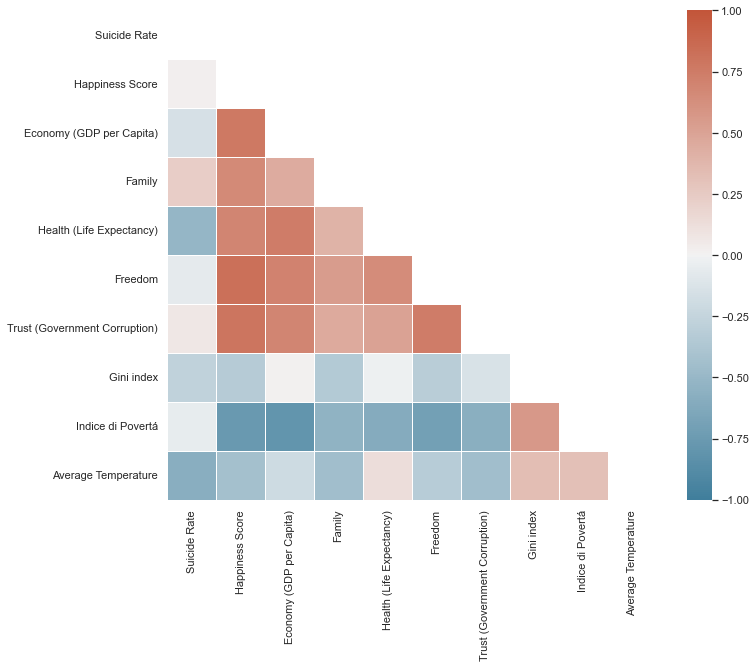

In [62]:
from string import ascii_letters

sns.set_theme(style="white")

# Compute the correlation matrix
corr = eu[['Suicide Rate','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Gini index', 'Indice di Povertá'
       , 'Temperatura Media']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

Ancora qualche passsaggio

In [39]:
corr = df_temp[['Tasso di Suicidi','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Gini index', 'Indice di Povertá'
       , 'Temperatura Media']].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
#4
#Values between 0 and 0.3 (0 and −0.3) indicate a weak positive (negative) linear relationship through a shaky linear rule.
#5
#Values between 0.3 and 0.7 (0.3 and −0.7) indicate a moderate positive (negative) linear relationship through a fuzzy-firm linear rule.
#6
#Values between 0.7 and 1.0 (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.

C:\Users\Federico\AppData\Local\Temp/ipykernel_17616/3793339488.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Tasso di Suicidi,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Gini index,Indice di Povertá,Temperatura Media
Tasso di Suicidi,1.00,-0.07,-0.06,0.08,-0.19,0.06,-0.02,0.13,0.09,-0.27
Happiness Score,-0.07,1.00,0.79,0.72,0.77,0.57,0.42,-0.21,-0.52,-0.40
Economy (GDP per Capita),-0.06,0.79,1.00,0.68,0.83,0.35,0.33,-0.29,-0.69,-0.46
Family,0.08,0.72,0.68,1.00,0.62,0.43,0.19,-0.19,-0.52,-0.45
Health (Life Expectancy),-0.19,0.77,0.83,0.62,1.00,0.35,0.25,-0.38,-0.56,-0.53
Freedom,0.06,0.57,0.35,0.43,0.35,1.00,0.49,0.08,-0.22,-0.10
Trust (Government Corruption),-0.02,0.42,0.33,0.19,0.25,0.49,1.00,-0.16,-0.09,-0.12
Gini index,0.13,-0.21,-0.29,-0.19,-0.38,0.08,-0.16,1.00,0.23,0.49
Indice di Povertá,0.09,-0.52,-0.69,-0.52,-0.56,-0.22,-0.09,0.23,1.00,0.33
Temperatura Media,-0.27,-0.40,-0.46,-0.45,-0.53,-0.10,-0.12,0.49,0.33,1.00


In [206]:
asia = df_1[df_1['Region'] == 'Southern Asia']
asia2 = df_1[df_1['Region'] == 'Southeastern Asia']
asia1 = df_1[df_1['Region'] == 'Eastern Asia']
asia = pd.concat([asia,asia1,asia2])

In [45]:
df_3['Varianza'] = df_3['Upper_value'] - df_3['Lower_value']

C:\Users\Federico\AppData\Local\Temp/ipykernel_7440/4278908533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Varianza'] = df_3['Upper_value'] - df_3['Lower_value']


In [43]:
df_temp= df_temp.rename(columns={'Average Temperature':'Temperatura Media', 'Value':'Tasso di Suicidi'})

NO

C:\Users\Federico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


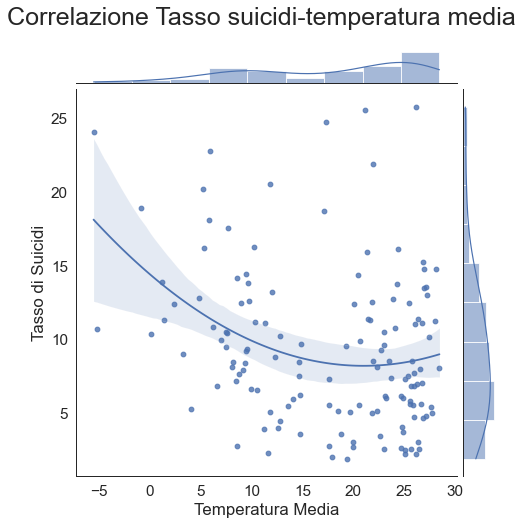

In [93]:
x= df_temp['Temperatura Media']
y = df_temp['Tasso di Suicidi']
sns.set_style("white")
sns.set_context("paper", font_scale=1.75)
rel = sns.jointplot(x, y, kind='reg', height=7,ratio=10, order=2)
rel.fig.suptitle('Correlazione Tasso suicidi-temperatura media', size=25, y=1.05, fontweight=5)
plt.show()

In [310]:
df_3= df_3.rename(columns={'Happiness Rank':'Posizione Classifica di Felicitá', 'Average annual working hours per worker':'Ore medie lavorative per abitante'})

In [157]:
df_2 = df_2.rename(columns={'Livello di Felicitá':'Punteggio di Felicitá', 'Average annual working hours per worker':'Ore medie lavorative per abitante'})

In [51]:
df_2.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Country', 'Value', 'Lower_value',
       'Upper_value', 'Unnamed: 0.1.1', 'Livello di Felicitá',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank', 'Entity', 'Unnamed: 0_y', 'Year',
       'Ore medie lavorative per abitante'],
      dtype='object')

SI

C:\Users\Federico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


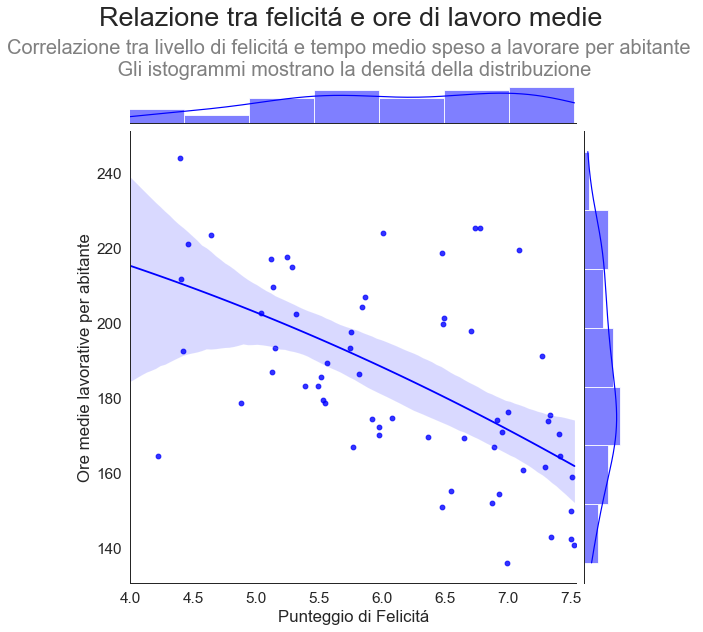

In [189]:
#Correlazione Felicitá/Tempo speso a lavorare mondo
x = df_2['Punteggio di Felicitá']
y = df_2['Ore medie lavorative per abitante']/10
z = df_2['Economy (GDP per Capita)']
sns.set_style("white")
sns.set_context("paper", font_scale=1.75)
sns.jointplot(x, y, kind='reg', height=8,ratio=10, order=2, xlim=(4,7.54), color='blue')
plt.suptitle('Correlazione tra livello di felicitá e tempo medio speso a lavorare per abitante \n Gli istogrammi mostrano la densitá della distribuzione', fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'},fontsize=20, y=1.05, color='grey')
plt.title('Relazione tra felicitá e ore di lavoro medie', size=27, y=1.22, fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'} ,fontweight=5)
plt.show()

In [70]:
df_3 = df_1[df_1["Indice di Povertá"]<200]

In [190]:
df_3 = df_3.rename(columns={'Livello di Felicitá':'Punteggio di Felicitá', 'Indice di Povertá':'Indice di Ricchezza'})

In [83]:
df_3['Indice di Ricchezza'] = (1/df_3['Indice di Ricchezza'])*10

OK

In [72]:
df_3.columns

Index(['Country', 'Value', 'Lower_value', 'Upper_value', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank'],
      dtype='object')

Text(1.0, 1.35, 'Relazione tra felicitá e indice di ricchezza')

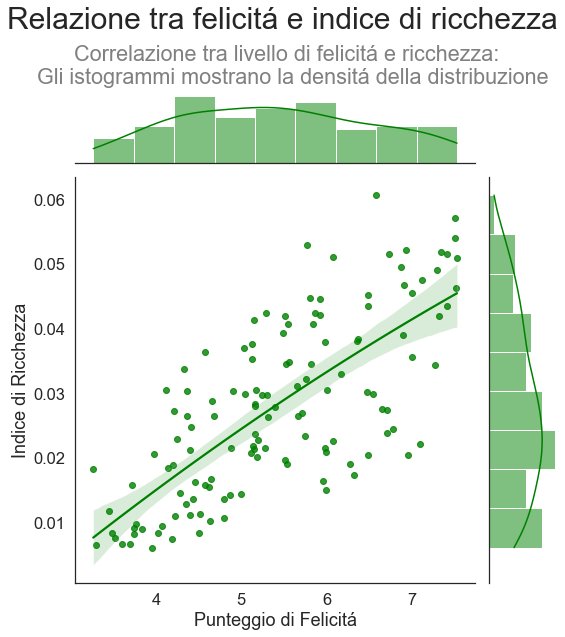

In [191]:
#Correlazione felicitá/benessere economico mondo
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5)
rel = sns.jointplot(data=df_3, x= "Punteggio di Felicitá", y="Indice di Ricchezza", kind='reg', order=2, height=8, color='green')
rel.fig.suptitle('Relazione Felicitá-Povertá', size=25, y=1.07,x=0.45, fontweight=5, horizontalalignment='center')
plt.suptitle('Correlazione tra livello di felicitá e ricchezza: \n Gli istogrammi mostrano la densitá della distribuzione',fontdict= {'fontsize':30,'verticalalignment': 'baseline','horizontalalignment': 'right'}, y=1.05, color='grey')
plt.title(label='Relazione tra felicitá e indice di ricchezza', size=30, y=1.35, loc='right', fontweight=5)

In [99]:
eu.columns

Index(['name', 'Country', 'Suicide Rate', 'Lower_value', 'Upper_value',
       'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Happiness Rank', 'Average Temperature'],
      dtype='object')

Forse

In [116]:
eu['Varianza'] = eu['Upper_value'] - eu['Lower_value']

In [96]:
df_3['Varianza'] = df_3['Upper_value'] - df_3['Lower_value']

In [215]:
eu = eu.rename(columns={'hue':'Varianza'})

In [192]:
df_3 = df_3.rename(columns={'Value':'Tasso di Suicidi','Varianza Tasso di Suicidi':'Intervallo di confidenza', 'Happiness Rank':'Posizione classifica felicitá'})

In [329]:
df_3.columns

Index(['Country', 'Tasso di Suicidi', 'Lower_value', 'Upper_value',
       'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Posizione Classifica di Felicitá',
       'Varianza Tasso di Suicidi'],
      dtype='object')

Forse

In [204]:
df_3.sort_values('Posizione classifica felicitá',ascending=False).head(50)

,Country,Tasso di Suicidi,Lower_value,Upper_value,Punteggio di Felicitá,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Gini index,Indice di Ricchezza,Region,Posizione classifica felicitá,Intervallo di confidenza
144,Syria,2.0050,1.2200,3.0475,3.2655,2.936,3.202,0.683095,0.263330,0.534970,0.041060,0.156665,0.48397,0.81789,37.514600,0.018209,Middle East and Northern Africa,145,1.8275
143,Togo,15.2650,9.0425,23.9150,3.3030,3.192,3.414,0.281230,0.000000,0.248110,0.346780,0.115870,0.17517,2.13540,43.056140,0.006532,Sub-Saharan Africa,144,14.8725
141,Tanzania,8.1650,5.0700,12.4400,3.4485,3.561,3.771,0.473775,0.830615,0.428000,0.367300,0.098995,0.31472,1.37769,40.491230,0.011701,Sub-Saharan Africa,142,7.3700
140,Benin,13.0150,7.7675,20.7850,3.4840,3.404,3.564,0.394990,0.104190,0.210280,0.397470,0.066810,0.20180,2.10812,47.755910,0.008271,Sub-Saharan Africa,141,13.0175
139,Rwanda,9.5800,5.5900,15.5975,3.5150,3.444,3.586,0.328460,0.615860,0.318650,0.543200,0.505210,0.23552,0.96819,43.710050,0.007515,Sub-Saharan Africa,140,10.0075
138,Guinea,12.4575,6.8150,20.6725,3.6070,3.533,3.681,0.224150,0.310900,0.188290,0.309530,0.119200,0.29914,2.15604,33.729700,0.006645,Sub-Saharan Africa,139,13.8575
136,Madagascar,9.3050,5.5100,14.8225,3.6950,3.621,3.769,0.279540,0.461150,0.371090,0.136840,0.075060,0.22040,2.15075,42.648180,0.006555,Sub-Saharan Africa,137,9.3125
135,Yemen,6.9975,3.5375,11.9800,3.7240,3.621,3.827,0.579390,0.474930,0.310480,0.228700,0.058920,0.09821,1.97295,36.707090,0.015784,Middle East and Northern Africa,136,8.4425
134,Burkina Faso,14.7675,9.0300,22.6700,3.7390,3.647,3.831,0.319950,0.630540,0.212970,0.333700,0.125330,0.24353,1.87319,35.301230,0.009063,Sub-Saharan Africa,135,13.6400
133,Uganda,10.5250,6.5225,16.5150,3.7390,3.629,3.849,0.347190,0.909810,0.196250,0.436530,0.064420,0.27102,1.51416,42.753690,0.008121,Sub-Saharan Africa,134,9.9925


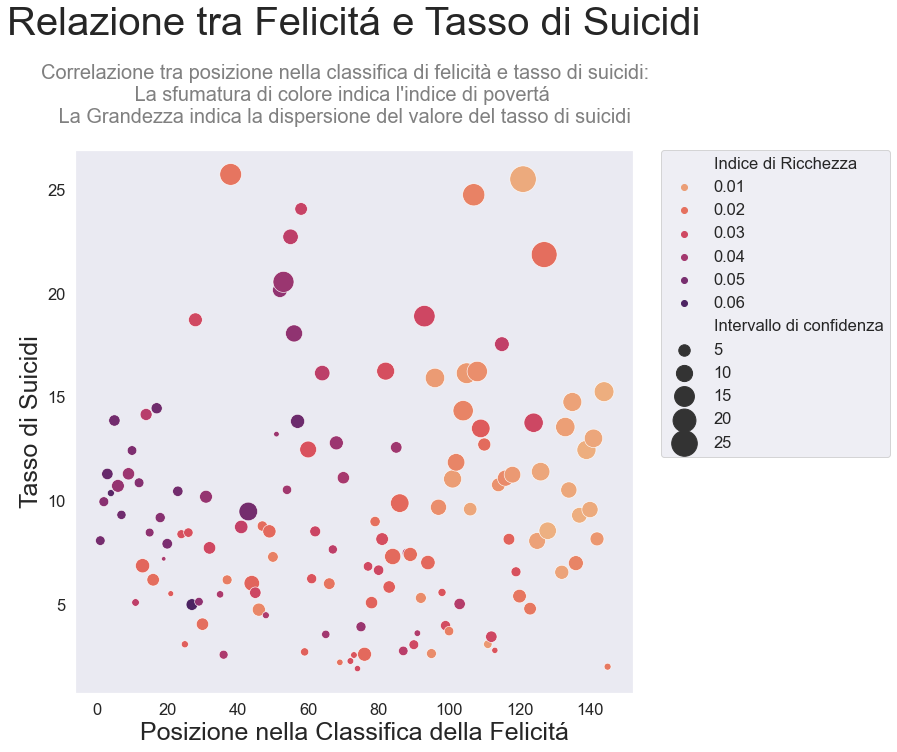

In [193]:
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data=df_3, x='Posizione classifica felicitá', y='Tasso di Suicidi',size='Intervallo di confidenza', legend=True, sizes=(20,700), hue='Indice di Ricchezza', palette=sns.color_palette("flare", as_cmap=True))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Posizione nella Classifica della Felicitá',fontsize=25)
ax.set_ylabel('Tasso di Suicidi',fontsize=25)
plt.title(label='Relazione tra Felicitá e Tasso di Suicidi', size=40, y=1.2, loc='center', fontweight=15)
plt.suptitle("Correlazione tra posizione nella classifica di felicità e tasso di suicidi:\n La sfumatura di colore indica l'indice di povertá  \n La Grandezza indica la dispersione del valore del tasso di suicidi ",fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'center'},fontweight=15, size=20, y=1, color='grey')

plt.show()

In [120]:
df_1['Varianza'] = df_1['Upper_value'] - df_1['Lower_value']
df_1 = df_1.rename(columns={'Value':'Tasso di Suicidi','Varianza':'Varianza Tasso di Suicidi'})

In [130]:
df_1 = df_1[df_1["Indice di Povertá"]<200]

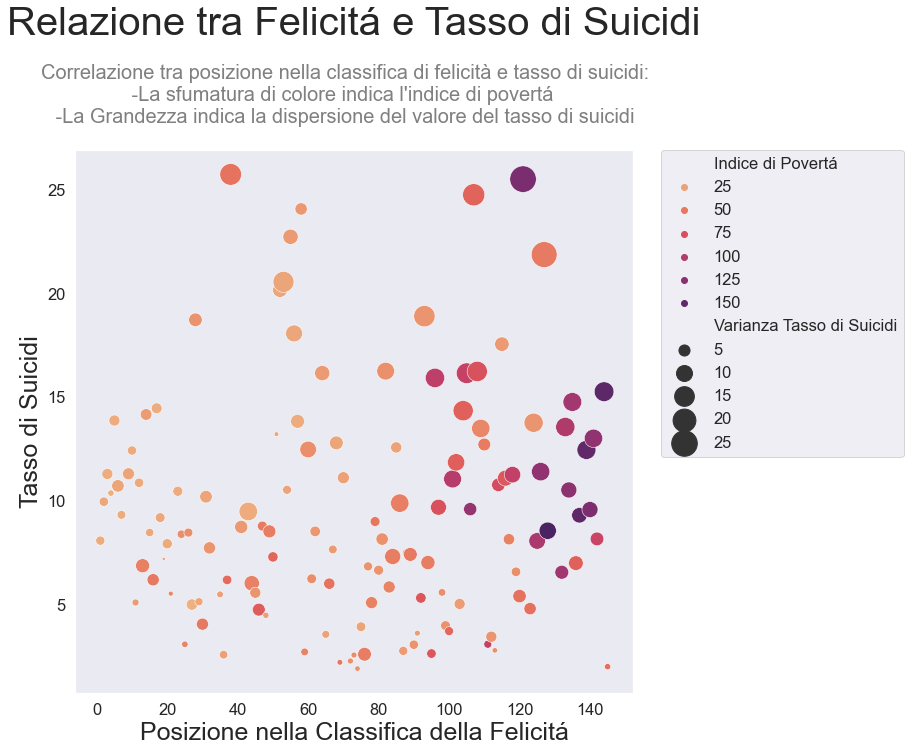

In [174]:
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data=df_1, x='Happiness Rank', y='Tasso di Suicidi',size='Varianza Tasso di Suicidi',
sizes=(10,700), hue='Indice di Povertá', palette=sns.color_palette("flare", as_cmap=True),legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Posizione nella Classifica della Felicitá',fontsize=25)
ax.set_ylabel('Tasso di Suicidi',fontsize=25)
plt.title(label='Relazione tra Felicitá e Tasso di Suicidi', size=40, y=1.2, loc='center', fontweight=5)
plt.suptitle("Correlazione tra posizione nella classifica di felicità e tasso di suicidi:\n -La sfumatura di colore indica l'indice di povertá  \n -La Grandezza indica la dispersione del valore del tasso di suicidi ",fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'},fontweight=15, size=20, y=1, color='grey')
plt.show()

In [115]:
eu.columns

Index(['name', 'Country', 'Tasso di Suicidi', 'Lower_value', 'Upper_value',
       'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Gini index', 'Indice di Povertá',
       'Region', 'Happiness Rank', 'Average Temperature'],
      dtype='object')

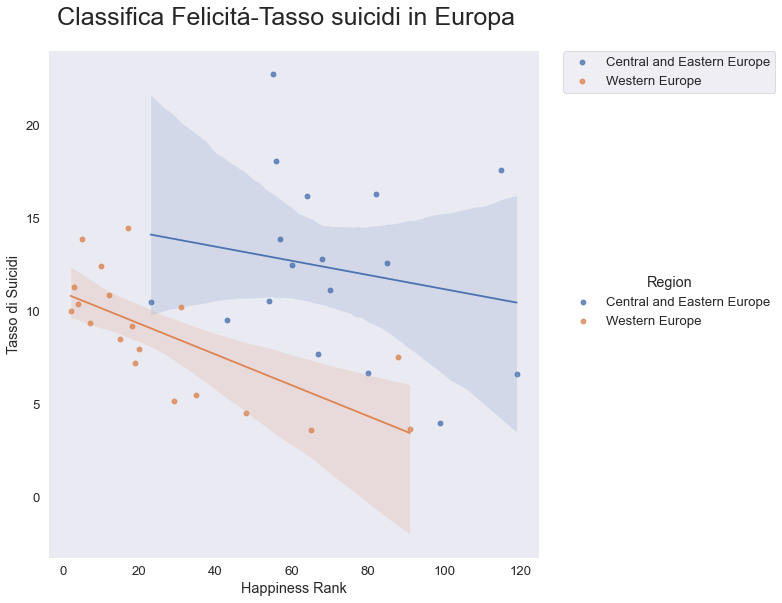

In [ ]:
#Correlazione Suicidi/Gdp Europa Occidentale
sns.set_style("dark")
sns.set_context(font_scale=2)
rel = sns.lmplot(data=eu, x='Happiness Rank', y='Tasso di Suicidi', hue='Region',height=8)
rel.fig.suptitle('Classifica Felicitá-Tasso suicidi in Europa', size=25, y=1.05, fontweight=5, x=0.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

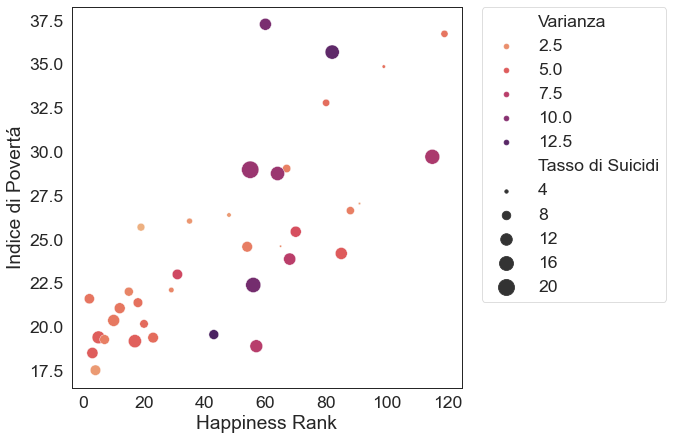

In [120]:
#Correlazione Suicidi/Indice di ricchezza Europa - Il colore indica varianza
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=2)
sns.scatterplot(data= eu, x='Happiness Rank', y='Indice di Povertá',size='Tasso di Suicidi', legend=True, sizes=(5,300), hue='Varianza', palette=sns.color_palette("flare", as_cmap=True))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [220]:
df_1.columns

Index(['Country', 'Value', 'Lower_value', 'Upper_value', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank'],
      dtype='object')

In [221]:
alt.Chart(df_1).mark_circle(size = 100).encode(
    x='Happiness Rank',
    y='Value',
    size='Value',
    tooltip=['Happiness Rank', 'Value', 'Indice di Povertá','Country','Region'],
    color=alt.Color('Region:N')
).interactive()

alt.Chart(...)

FINO A QUI OK

In [226]:
alt.Chart(table_2_1).mark_circle(size=60).encode(
    x='Happiness Rank',
    y='Value',
    size='Indice di Povertá',
    tooltip=['Happiness Rank', 'Value', 'new_value', 'Region']
).interactive()

NameError: name 'table_2_1' is not defined

In [ ]:
df_1.sort_values('Value', ascending=False).head(10)

In [ ]:
df_temp.sort_values('Value', ascending=False)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Value'>

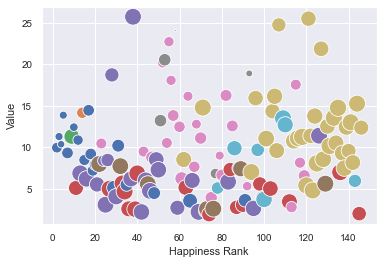

In [274]:
#Correlazione Suicidi/Temperature
sns.scatterplot(data= df_temp, x='Happiness Rank', y='Value', size='Temperature', legend=False, sizes=(5, 300), hue='Region')

In [ ]:
#Correlazione Suicidi/Gdp Europa Est
x = eu2['Happiness Rank']
y = eu2['Value']
z = eu2['Indice di Povertá']
sns.scatterplot(x, y, size=z, legend=False, sizes=(5, 300))